# BMI Prediction Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
bio_data = pd.read_csv(r'C:\Users\ryanj\Desktop\CSA2025\data\anthropometric_trait_gwas.csv')

In [4]:
bio_data.columns

Index(['age', 'sex', 'cohort', 'systolic_BP', 'diastolic_BP',
       'LDL_cholesterol', 'HDL_cholesterol', 'height', 'weight', 'BMI',
       ...
       'SNP_991', 'SNP_992', 'SNP_993', 'SNP_994', 'SNP_995', 'SNP_996',
       'SNP_997', 'SNP_998', 'SNP_999', 'SNP_1000'],
      dtype='object', length=1013)

In [5]:
features_to_scale = ['LDL_cholesterol', 'HDL_cholesterol', 'systolic_BP', 'diastolic_BP', 'BMI', 'age', 'weight', 'height', 'waist_circumference', 'hip_circumference']
scaler = StandardScaler()
bio_data[features_to_scale] = scaler.fit_transform(bio_data[features_to_scale])

In [6]:

df = bio_data['sex']
df


0        Male
1        Male
2        Male
3      Female
4        Male
        ...  
995    Female
996      Male
997    Female
998      Male
999      Male
Name: sex, Length: 1000, dtype: object

In [7]:
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(df.to_frame())
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out([df.name]))
bio_data = pd.concat([bio_data, one_hot_df], axis=1)

bio_data

,age,sex,cohort,systolic_BP,diastolic_BP,LDL_cholesterol,HDL_cholesterol,height,weight,BMI,...,SNP_993,SNP_994,SNP_995,SNP_996,SNP_997,SNP_998,SNP_999,SNP_1000,sex_Female,sex_Male
0,0.812959,Male,Ugandan,-0.606279,0.444187,1.172468,-1.039078,0.679301,0.090362,-0.336726,...,1,1,2,2,0,2,1,1,0.0,1.0
1,1.680578,Male,Zulu,1.095283,-0.377477,-0.548804,0.161857,0.833478,0.636477,0.162759,...,2,0,0,0,1,0,2,0,0.0,1.0
2,0.145560,Male,Zulu,0.101649,0.185789,0.933073,-0.471807,1.218919,-0.229065,-1.004657,...,1,1,1,2,1,1,0,1,0.0,1.0
3,-0.788799,Female,Ugandan,0.274759,-0.446832,-0.261840,-0.254707,-1.016640,-1.517073,-1.312590,...,2,1,1,0,1,0,0,2,1.0,0.0
4,1.079919,Male,Zulu,-0.848938,1.276010,-1.287763,2.616544,1.450184,1.136224,0.248922,...,1,1,1,2,1,1,1,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.079919,Female,Ugandan,0.440924,-0.451885,-0.586172,-2.240235,-0.939551,-0.970957,-0.574905,...,1,2,1,1,1,0,0,1,1.0,0.0
996,1.346879,Male,Zulu,1.335696,0.672409,-1.016762,2.036893,0.756390,0.791038,0.390309,...,2,1,2,2,0,2,0,0,0.0,1.0
997,1.213399,Female,Zulu,0.015416,-1.209443,0.359200,0.122714,-1.016640,-0.177544,0.631511,...,0,1,1,0,0,2,0,0,1.0,0.0
998,-0.588580,Male,Ugandan,0.144177,-0.905162,-0.950735,0.708337,0.987654,0.445852,-0.151409,...,2,2,2,2,0,2,2,0,0.0,1.0


In [8]:
bio_data2 = bio_data.drop(columns=['sex', 'cohort'])
bio_data2

,age,systolic_BP,diastolic_BP,LDL_cholesterol,HDL_cholesterol,height,weight,BMI,waist_circumference,hip_circumference,...,SNP_993,SNP_994,SNP_995,SNP_996,SNP_997,SNP_998,SNP_999,SNP_1000,sex_Female,sex_Male
0,0.812959,-0.606279,0.444187,1.172468,-1.039078,0.679301,0.090362,-0.336726,-0.507418,-1.610935,...,1,1,2,2,0,2,1,1,0.0,1.0
1,1.680578,1.095283,-0.377477,-0.548804,0.161857,0.833478,0.636477,0.162759,1.193366,0.222913,...,2,0,0,0,1,0,2,0,0.0,1.0
2,0.145560,0.101649,0.185789,0.933073,-0.471807,1.218919,-0.229065,-1.004657,0.466989,-0.302641,...,1,1,1,2,1,1,0,1,0.0,1.0
3,-0.788799,0.274759,-0.446832,-0.261840,-0.254707,-1.016640,-1.517073,-1.312590,-0.294820,-0.906469,...,2,1,1,0,1,0,0,2,1.0,0.0
4,1.079919,-0.848938,1.276010,-1.287763,2.616544,1.450184,1.136224,0.248922,1.397105,0.491281,...,1,1,1,2,1,1,1,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.079919,0.440924,-0.451885,-0.586172,-2.240235,-0.939551,-0.970957,-0.574905,-1.783006,-1.152473,...,1,2,1,1,1,0,0,1,1.0,0.0
996,1.346879,1.335696,0.672409,-1.016762,2.036893,0.756390,0.791038,0.390309,0.378407,0.077547,...,2,1,2,2,0,2,0,0,0.0,1.0
997,1.213399,0.015416,-1.209443,0.359200,0.122714,-1.016640,-0.177544,0.631511,1.281948,1.229293,...,0,1,1,0,0,2,0,0,1.0,0.0
998,-0.588580,0.144177,-0.905162,-0.950735,0.708337,0.987654,0.445852,-0.151409,-0.959189,-0.123729,...,2,2,2,2,0,2,2,0,0.0,1.0


# set the Target, Y and Data, X

In [9]:
Y = bio_data2['BMI']
X = bio_data2.drop(columns=['BMI'], axis=1)

In [10]:
Y

0     -0.336726
1      0.162759
2     -1.004657
3     -1.312590
4      0.248922
         ...   
995   -0.574905
996    0.390309
997    0.631511
998   -0.151409
999   -0.606174
Name: BMI, Length: 1000, dtype: float64

In [11]:
X

,age,systolic_BP,diastolic_BP,LDL_cholesterol,HDL_cholesterol,height,weight,waist_circumference,hip_circumference,WHR,...,SNP_993,SNP_994,SNP_995,SNP_996,SNP_997,SNP_998,SNP_999,SNP_1000,sex_Female,sex_Male
0,0.812959,-0.606279,0.444187,1.172468,-1.039078,0.679301,0.090362,-0.507418,-1.610935,1.013605,...,1,1,2,2,0,2,1,1,0.0,1.0
1,1.680578,1.095283,-0.377477,-0.548804,0.161857,0.833478,0.636477,1.193366,0.222913,1.038241,...,2,0,0,0,1,0,2,0,0.0,1.0
2,0.145560,0.101649,0.185789,0.933073,-0.471807,1.218919,-0.229065,0.466989,-0.302641,1.005005,...,1,1,1,2,1,1,0,1,0.0,1.0
3,-0.788799,0.274759,-0.446832,-0.261840,-0.254707,-1.016640,-1.517073,-0.294820,-0.906469,0.971429,...,2,1,1,0,1,0,0,2,1.0,0.0
4,1.079919,-0.848938,1.276010,-1.287763,2.616544,1.450184,1.136224,1.397105,0.491281,1.036449,...,1,1,1,2,1,1,1,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.079919,0.440924,-0.451885,-0.586172,-2.240235,-0.939551,-0.970957,-1.783006,-1.152473,0.812568,...,1,2,1,1,1,0,0,1,1.0,0.0
996,1.346879,1.335696,0.672409,-1.016762,2.036893,0.756390,0.791038,0.378407,0.077547,0.962246,...,2,1,2,2,0,2,0,0,0.0,1.0
997,1.213399,0.015416,-1.209443,0.359200,0.122714,-1.016640,-0.177544,1.281948,1.229293,0.964789,...,0,1,1,0,0,2,0,0,1.0,0.0
998,-0.588580,0.144177,-0.905162,-0.950735,0.708337,0.987654,0.445852,-0.959189,-0.123729,0.830542,...,2,2,2,2,0,2,2,0,0.0,1.0


In [12]:
from sklearn.model_selection import train_test_split

## Perform 80/20 Data split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
X_train.shape, Y_train.shape

((800, 1012), (800,))

In [15]:
X_test.shape, Y_test.shape

((200, 1012), (200,))

## Import model training modules

In [16]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
model = linear_model.LinearRegression()


Train the model

In [18]:
model.fit(X_train, Y_train)

LinearRegression()

Predict the target Y using X_test

In [19]:
Y_pred = model.predict(X_test)

## Prediction results

In [20]:
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))

Coefficients:  [-0.01826425 -0.03441991 -0.01041211 ...  0.00404782  0.09296552
 -0.09296552]
Intercept:  -1.732935616305228
Mean squared error: 0.45
Coefficient of determination: 0.56


In [21]:
bio_data2

,age,systolic_BP,diastolic_BP,LDL_cholesterol,HDL_cholesterol,height,weight,BMI,waist_circumference,hip_circumference,...,SNP_993,SNP_994,SNP_995,SNP_996,SNP_997,SNP_998,SNP_999,SNP_1000,sex_Female,sex_Male
0,0.812959,-0.606279,0.444187,1.172468,-1.039078,0.679301,0.090362,-0.336726,-0.507418,-1.610935,...,1,1,2,2,0,2,1,1,0.0,1.0
1,1.680578,1.095283,-0.377477,-0.548804,0.161857,0.833478,0.636477,0.162759,1.193366,0.222913,...,2,0,0,0,1,0,2,0,0.0,1.0
2,0.145560,0.101649,0.185789,0.933073,-0.471807,1.218919,-0.229065,-1.004657,0.466989,-0.302641,...,1,1,1,2,1,1,0,1,0.0,1.0
3,-0.788799,0.274759,-0.446832,-0.261840,-0.254707,-1.016640,-1.517073,-1.312590,-0.294820,-0.906469,...,2,1,1,0,1,0,0,2,1.0,0.0
4,1.079919,-0.848938,1.276010,-1.287763,2.616544,1.450184,1.136224,0.248922,1.397105,0.491281,...,1,1,1,2,1,1,1,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.079919,0.440924,-0.451885,-0.586172,-2.240235,-0.939551,-0.970957,-0.574905,-1.783006,-1.152473,...,1,2,1,1,1,0,0,1,1.0,0.0
996,1.346879,1.335696,0.672409,-1.016762,2.036893,0.756390,0.791038,0.390309,0.378407,0.077547,...,2,1,2,2,0,2,0,0,0.0,1.0
997,1.213399,0.015416,-1.209443,0.359200,0.122714,-1.016640,-0.177544,0.631511,1.281948,1.229293,...,0,1,1,0,0,2,0,0,1.0,0.0
998,-0.588580,0.144177,-0.905162,-0.950735,0.708337,0.987654,0.445852,-0.151409,-0.959189,-0.123729,...,2,2,2,2,0,2,2,0,0.0,1.0


In [22]:
bio_data2.to_csv(r'C:\Users\ryanj\Desktop\CSA2025\data\bio_data2.csv', index=False)

In [23]:
r2_score(Y_test, Y_pred)

0.5587608568858737

Scatter Plots showing model accuracy

<Axes: xlabel='BMI'>

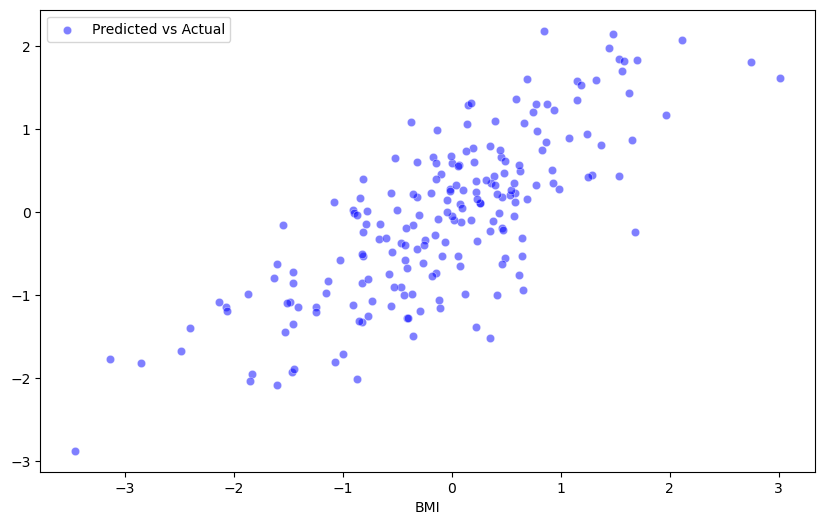

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

# Get the index of the test set to align with the original DataFrame
test_idx = X_test.index

# Use the original 'sex' column from bio_data for hue
sex_test = bio_data.loc[test_idx, 'sex']

sns.scatterplot(x=Y_test, y=Y_pred, color='blue', label='Predicted vs Actual', alpha=0.5, ax=ax)

In [ ]:
Y_pred

array([-0.19397833,  0.27711642, -1.14629642, -0.99348185,  0.32861992,
        0.16687502, -1.93244069,  0.79647602, -1.9464956 , -0.62961669,
       -0.14277642, -0.27208162, -1.49238407,  0.44188622, -2.03581146,
        0.22373708, -0.22203399,  1.84069339,  1.80640942,  0.20169981,
        0.1094693 ,  1.59749647, -0.73392353,  0.22966966,  0.14652577,
       -0.8505957 ,  1.97809668, -0.33792041, -0.48002742, -0.45042929,
       -1.32009027, -0.97009874, -0.77560949,  0.84512334,  1.08554018,
       -0.32338494, -1.15091369,  0.97969013, -1.71627554, -0.01202302,
        1.82699374,  0.03028886, -1.06583334, -0.10907544, -0.31652423,
        0.9880382 ,  0.6655908 ,  1.20282135, -1.14560778,  0.32060068,
        0.09193304, -0.52989826, -1.44113574,  1.58798098,  0.02364607,
        0.18392091,  0.26638452,  0.86429838, -0.98549805,  0.22456637,
       -1.8076756 , -1.28156516, -1.52180378, -1.39348908, -0.37284325,
       -1.14207791,  0.66551868,  0.12123743, -0.53188985,  0.43

: 